In [138]:
# Importando bibliotecas
import os
from os import path
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [117]:
# abrindo arquivos

pasta = './data_result'
caminhos = [os.path.join(pasta, nome) for nome in os.listdir(pasta)]
arquivos = [arq for arq in caminhos if os.path.isfile(arq)]
resp = [arq for arq in arquivos if arq.lower()]
resp

['./data_result/part-00004',
 './data_result/part-00000',
 './data_result/part-00003',
 './data_result/part-00002',
 './data_result/part-00001']

In [37]:
# Abrindo arquivos
arqs = []
for arq in resp:
    with open(arq,'r') as f:
        arqs += f.readlines()

In [65]:
# tratando dados e salvando em uma lista de listas
arquivos_ = [i.replace('\n','').replace('"','').split("\t") for i in arqs]

In [84]:
# criando dataframe
df = pd.DataFrame(arquivos_, columns=['palavra','quantidade'])

In [107]:
# Exibindo as 10 primeiras linhas
df.head(10)

,palavra,quantidade
0,100,4
1,150,1
2,16a,1
3,1890,2
4,2,7
5,2001,1
6,22nd,3
7,27,2
8,2_s_,2
9,2nd,1


In [85]:
#  convertendo a coluna quantidade em inteiro
df['quantidade'] = pd.to_numeric(df['quantidade'])


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   palavra     8190 non-null   object
 1   quantidade  8190 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.1+ KB


In [100]:
# Ordenando dataframe
df_ordenado = df.sort_values(by='quantidade', ascending=False)

In [109]:
# Pegando as 10 primeiras palavras
df_ordenado.head(10)

,palavra,quantidade
3126,the,5815
6630,and,3085
752,i,3038
8025,to,2826
5902,of,2781
6568,a,2700
775,in,1826
6355,that,1767
2478,it,1749
4944,you,1577


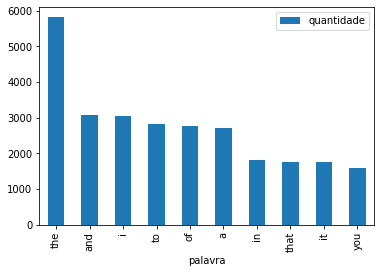

In [129]:
df_ordenado.head(10).plot(kind='bar',x='palavra');

In [136]:
# Transformando (de lista para dicionário) pois a função que utilizaremos nesse caso requer um dicionário
data = dict(zip(df['palavra'].tolist(), df['quantidade'].tolist()))

{'100': 4, '150': 1, '16a': 1, '1890': 2, '2': 7, '2001': 1, '22nd': 3, '27': 2, '2_s_': 2, '2nd': 1, '31': 1, '3rd': 3, '40': 1, '501': 1, '7': 4, '77': 1, '7_s_': 1, '7th': 1, '90': 3, '_bijou_': 1, '_chronicle_': 1, '_danseuse_': 1, '_fianc\\u00e9_': 1, '_p\\u00e2t\\u00e9': 1, '_partie': 1, '_standard_': 1, '_very_': 1, 'about': 176, 'abroad': 2, 'absent': 1, 'absorbed': 1, 'abutted': 2, 'accent': 2, 'acceptance': 1, 'accessed': 1, 'accident': 5, 'accommodate': 1, 'accompany': 1, 'accompanying': 1, 'accompli_': 1, 'accomplished': 2, 'accomplishments': 2, 'accustomed': 7, 'acetones': 1, 'acquirement': 1, 'actionable': 2, 'actually': 7, 'addressed': 2, 'addresses': 1, 'adjusted': 2, 'admiring': 2, 'advanced': 2, 'advantages': 4, 'adventuress': 1, 'adviser': 2, 'affair': 14, 'affect': 2, 'affecting': 1, 'affectionate': 2, 'affliction': 1, 'afterwards': 18, 'against': 53, 'agricultural': 2, 'akimbo': 1, 'alive': 12, 'allegro': 2, 'allusions': 1, 'along': 18, 'altered': 1, 'always': 58, 

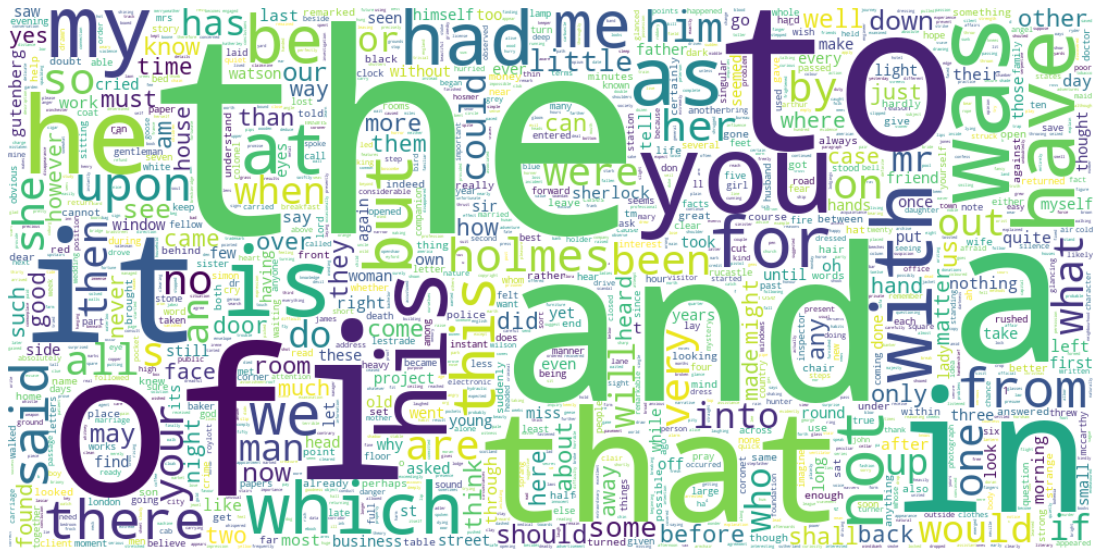

In [151]:
# Gerando nuvem de palavras
wc = WordCloud(background_color="white", max_words=2000,
               max_font_size=256,
               random_state=42, width=1000, height=500)
#ajuste do tamanho das palavras
wc.generate_from_frequencies(data) 
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()